# Лабораторная работа № 1

## Одномерный поиск: дихотомия, золотое сечение, Фибоначчи

### 👩‍💻 Авторы:
- Студенты: *Шаменков Максим и Забиров Радик*
- Группа: *6313*

### 🎯 Цель работы
Изучить и реализовать поисковые методы функций, а именно:
- метод дихотомии;
- метод золотого сечения;
- метод Фибоначчи.

Сравнить точность и эффективность методов на тестовой функции, а также провести анализ расхождений с аналитическим решением, найденным с помощью SymPy.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

from math import tan, pi, sqrt

### 🧠 Исходные данные

Целевая функция:
$$
f(x) = \tan(|x|^{3/2}), \quad x \in \left[-\frac{\pi}{4}, \frac{\pi}{3}\right]
$$


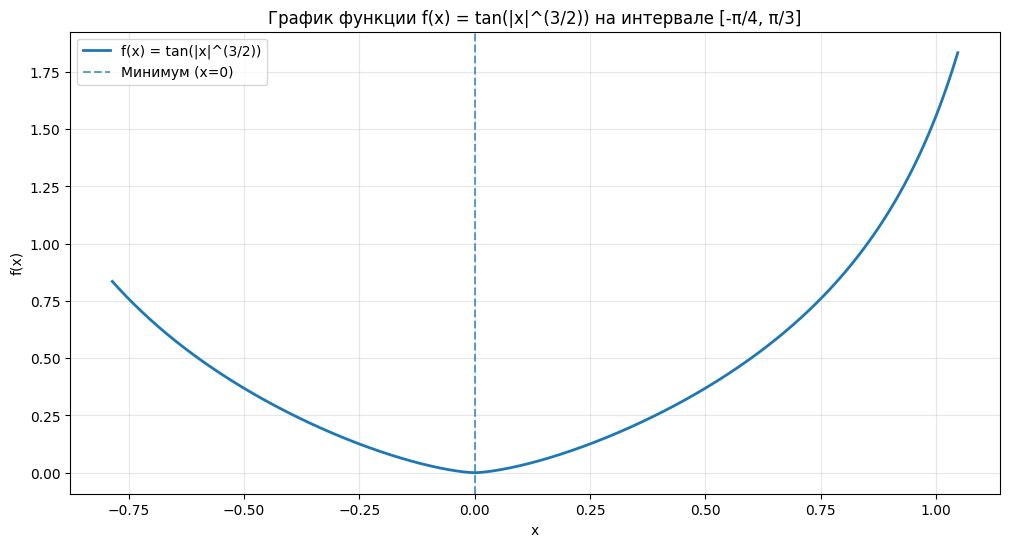

In [8]:
def target_function(x):
    return tan(abs(x) ** (3.0 / 2.0))


def plot_function():
    a, b = -pi / 4, pi / 3
    x_vals = np.linspace(a, b, 1000)
    y_vals = [target_function(x) for x in x_vals]

    plt.figure(figsize=(12, 6))
    plt.plot(x_vals, y_vals, linewidth=2, label='f(x) = tan(|x|^(3/2))')
    plt.axvline(x=0, linestyle='--', alpha=0.7, label='Минимум (x=0)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('График функции f(x) = tan(|x|^(3/2)) на интервале [-π/4, π/3]')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

plot_function()

### ⚙️ Реализация на Python

In [9]:
class OptimizationMethods:
    def __init__(self, func, a, b, delta):
        self.func = func
        self.a = a
        self.b = b
        self.delta = delta
        self.func_calls = 0
        self.iterations = 0

    def reset_counter(self):
        self.func_calls = 0
        self.iterations = 0

    def evaluate(self, x):
        self.func_calls += 1
        return self.func(x)

    def dichotomy(self):
        self.reset_counter()
        a, b = self.a, self.b
        epsilon = self.delta / 4.0

        while (b - a) > self.delta:
            self.iterations += 1
            mid = (a + b) / 2.0
            x1 = mid - epsilon / 2.0
            x2 = mid + epsilon / 2.0

            f1 = self.evaluate(x1)
            f2 = self.evaluate(x2)

            if f1 < f2:
                b = x2
            else:
                a = x1

        x_min = (a + b) / 2.0
        f_min = self.evaluate(x_min)

        return {
            'method': 'Дихотомии',
            'x_min': x_min,
            'f_min': f_min,
            'iterations': self.iterations,
            'func_calls': self.func_calls,
            'left_bound': a,
            'right_bound': b,
            'error': b - a
        }

    def golden_section(self):
        self.reset_counter()
        a, b = self.a, self.b
        phi = (sqrt(5) - 1) / 2.0

        x1 = b - phi * (b - a)
        x2 = a + phi * (b - a)

        f1 = self.evaluate(x1)
        f2 = self.evaluate(x2)

        while (b - a) > self.delta:
            self.iterations += 1
            if f1 < f2:
                b = x2
                x2 = x1
                f2 = f1
                x1 = b - phi * (b - a)
                f1 = self.evaluate(x1)
            else:
                a = x1
                x1 = x2
                f1 = f2
                x2 = a + phi * (b - a)
                f2 = self.evaluate(x2)

        x_min = (a + b) / 2.0

        return {
            'method': 'Золотого сечения',
            'x_min': x_min,
            'f_min': self.func(x_min),
            'iterations': self.iterations,
            'func_calls': self.func_calls,
            'left_bound': a,
            'right_bound': b,
            'error': b - a
        }

    def fibonacci_method(self, golden_iterations=None):
        self.reset_counter()
        a, b = self.a, self.b

        if golden_iterations is not None:
            n = golden_iterations + 1
        else:
            length = b - a
            fib = [1, 1]
            while fib[-1] < length / self.delta:
                fib.append(fib[-1] + fib[-2])
            n = len(fib) - 1

        fib = self._generate_fibonacci_sequence(n + 1)

        x1 = a + (fib[n-2] / fib[n]) * (b - a)
        x2 = a + (fib[n-1] / fib[n]) * (b - a)

        f1 = self.evaluate(x1)
        f2 = self.evaluate(x2)

        for k in range(1, n - 1):
            self.iterations += 1
            if f1 > f2:
                a = x1
                x1 = x2
                x2 = a + (fib[n - k - 1] / fib[n - k + 1]) * (b - a)
                f1 = f2
                f2 = self.evaluate(x2)
            else:
                b = x2
                x2 = x1
                x1 = b - (fib[n - k] / fib[n - k + 1]) * (b - a)
                f2 = f1
                f1 = self.evaluate(x1)

        self.iterations += 1

        if f1 > f2:
            a = x1
            x1 = x2
            x2 = a + (b - a) / 2
            f1 = f2
            f2 = self.evaluate(x2)
        else:
            b = x2
            x2 = x1
            x1 = a + (b - a) / 2
            f2 = f1
            f1 = self.evaluate(x1)

        if f1 <= f2:
            b = x2
        else:
            a = x1

        x_min = (a + b) / 2.0

        return {
            'method': 'Фибоначчи',
            'x_min': x_min,
            'f_min': self.func(x_min),
            'iterations': self.iterations,
            'func_calls': self.func_calls,
            'left_bound': a,
            'right_bound': b,
            'error': b - a
        }

    def _generate_fibonacci_sequence(self, n):
        if n <= 0:
            return []
        elif n == 1:
            return [1]
        elif n == 2:
            return [1, 1]

        fib = [1, 1]
        for i in range(2, n):
            fib.append(fib[-1] + fib[-2])
        return fib

In [10]:
def analytical_solution_sympy(a_val=-sp.pi / 4, b_val=sp.pi / 3):
    print("=== АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ SYMPY ===")

    x = sp.symbols('x', real=True)
    f = sp.tan(sp.Abs(x) ** sp.Rational(3, 2))

    print(f"Исходная функция: f(x) = {f}")

    f_prime = sp.diff(f, x)
    f_prime_simpl = sp.simplify(f_prime)
    print(f"Производная: f'(x) = {f_prime_simpl}")

    critical_points = set()
    try:
        sols = sp.solveset(sp.Eq(f_prime_simpl, 0), x, domain=sp.S.Reals)
        if isinstance(sols, sp.FiniteSet):
            for s in sols:
                try:
                    s_num = float(sp.N(s))
                    critical_points.add(s_num)
                except Exception:
                    pass
    except Exception as e:
        print("Внимание: solveset не смог корректно найти решения (fallback):", e)

    a_num = float(sp.N(a_val))
    b_num = float(sp.N(b_val))

    critical_points.add(a_num)
    critical_points.add(b_num)
    if a_num <= 0.0 <= b_num:
        critical_points.add(0.0)

    candidates = []
    for pt in sorted(critical_points):
        try:
            f_val = float(sp.N(f.subs(x, pt)))
        except Exception:
            try:
                f_val = float(sp.N(f.subs(x, sp.N(pt))))
            except Exception:
                continue
        candidates.append((pt, f_val))
        print(f"Кандидат: x = {pt:.10f}, f(x) ≈ {f_val:.10e}")

    if not candidates:
        raise RuntimeError("Не удалось получить кандидатов для минимума (что-то пошло не так).")

    min_point, min_value = min(candidates, key=lambda t: t[1])

    print("\nРЕЗУЛЬТАТ АНАЛИТИЧЕСКОГО РЕШЕНИЯ:")
    print(f"Минимум: x = {min_point:.10f}")
    print(f"Значение функции в минимуме: f(x) = {min_value:.10f}")

    return float(min_point), float(min_value)

### Формирование результатов

In [11]:
def create_comparison_table(results, analytical_min, analytical_val):
    data = []

    data.append({
        'Метод': 'Аналитический (SymPy)',
        'Итерации': '-',
        'Вычисления f(x)': '-',
        'x_min': f"{analytical_min:.10f}",
        'f(x_min)': f"{analytical_val:.10f}",
        'Левая граница': f"{-pi/4:.6f}",
        'Правая граница': f"{pi/3:.6f}",
        'Погрешность': '-',
    })

    for result in results:
        deviation = abs(result['x_min'] - analytical_min)
        data.append({
            'Метод': result['method'],
            'Итерации': result['iterations'],
            'Вычисления f(x)': result['func_calls'],
            'x_min': f"{result['x_min']:.10f}",
            'f(x_min)': f"{result['f_min']:.10f}",
            'Левая граница': f"{result['left_bound']:.8f}",
            'Правая граница': f"{result['right_bound']:.8f}",
            'Погрешность': f"{result['error']:.2e}",
        })

    df = pd.DataFrame(data)
    return df


def print_detailed_results(method_name, result):
    print(f"\n{method_name}")
    print("=" * 60)
    print(f"Найденный минимум: x = {result['x_min']:.10f}")
    print(f"Значение функции: f(x) = {result['f_min']:.10f}")
    print(f"Количество итераций: {result['iterations']}")
    print(f"Количество вычислений функции: {result['func_calls']}")
    print(f"Финальный интервал: [{result['left_bound']:.8f}, {result['right_bound']:.8f}]")
    print(f"Длина интервала: {result['error']:.2e}")

In [12]:
def main():
    a, b = -pi / 4, pi / 3
    delta = 1e-6

    analytical_min, analytical_val = analytical_solution_sympy()

    optimizer = OptimizationMethods(target_function, a, b, delta)

    results = []

    dichotomy_result = optimizer.dichotomy()
    results.append(dichotomy_result)
    print_detailed_results("МЕТОД ДИХОТОМИИ", dichotomy_result)

    golden_result = optimizer.golden_section()
    results.append(golden_result)
    print_detailed_results("МЕТОД ЗОЛОТОГО СЕЧЕНИЯ", golden_result)

    fibonacci_result = optimizer.fibonacci_method(golden_iterations=golden_result['iterations'])
    results.append(fibonacci_result)
    print_detailed_results("МЕТОД ФИБОНАЧЧИ", fibonacci_result)

    print("\n" + "=" * 120)
    print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
    print("=" * 120)
    comparison_df = create_comparison_table(results, analytical_min, analytical_val)
    print(comparison_df.to_string(index=False))
    print("=" * 120)

    dichotomy_error = dichotomy_result['error']
    golden_error = golden_result['error']
    fibonacci_error = fibonacci_result['error']
    print(f"\nТочность методов (длина финального интервала):")
    print(f"   - Дихотомия: {dichotomy_error:.2e}")
    print(f"   - Золотое сечение: {golden_error:.2e}")
    print(f"   - Фибоначчи: {fibonacci_error:.2e}")

    print(f"\nКоличество итераций:")
    print(f"   - Золотое сечение: {golden_result['iterations']}")
    print(f"   - Фибоначчи: {fibonacci_result['iterations']}")


if __name__ == "__main__":
    main()

=== АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ SYMPY ===
Исходная функция: f(x) = tan(Abs(x)**(3/2))
Производная: f'(x) = Piecewise((0, Eq(x, 0)), (3*x/(2*cos(Abs(x)**(3/2))**2*Abs(sqrt(x))), True))
Кандидат: x = -0.7853981634, f(x) ≈ 8.3554312598e-01
Кандидат: x = 0.0000000000, f(x) ≈ 0.0000000000e+00
Кандидат: x = 1.0471975512, f(x) ≈ 1.8340994675e+00

РЕЗУЛЬТАТ АНАЛИТИЧЕСКОГО РЕШЕНИЯ:
Минимум: x = 0.0000000000
Значение функции в минимуме: f(x) = 0.0000000000

МЕТОД ДИХОТОМИИ
Найденный минимум: x = -0.0000001382
Значение функции: f(x) = 0.0000000001
Количество итераций: 22
Количество вычислений функции: 45
Финальный интервал: [-0.00000048, 0.00000021]
Длина интервала: 6.87e-07

МЕТОД ЗОЛОТОГО СЕЧЕНИЯ
Найденный минимум: x = -0.0000002775
Значение функции: f(x) = 0.0000000001
Количество итераций: 30
Количество вычислений функции: 32
Финальный интервал: [-0.00000077, 0.00000021]
Длина интервала: 9.85e-07

МЕТОД ФИБОНАЧЧИ
Найденный минимум: x = -0.0538498913
Значение функции: f(x) = 0.0124968297
Ко